In [1]:
import pandas as pd 
from sqlalchemy import create_engine 
import numpy as np

### Extract the data

In [2]:
#Extracts the first sheet "2013-2020 Police Killings" from the xls spreadsheet

data_file = "data/MPVDatasetDownload.xlsx"
police_data_df = pd.read_excel(data_file, sheet_name="2013-2020 Police Killings")
police_data_df.head()

,Victim's name,Victim's age,Victim's gender,Victim's race,URL of image of victim,Date of Incident (month/day/year),Street Address of Incident,City,State,Zipcode,...,Symptoms of mental illness?,Unarmed/Did Not Have an Actual Weapon,Alleged Weapon (Source: WaPo and Review of Cases Not Included in WaPo Database),Alleged Threat Level (Source: WaPo),Fleeing (Source: WaPo),Body Camera (Source: WaPo),WaPo ID (If included in WaPo database),Off-Duty Killing?,Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx ),ID
0,Kevin Lee Catlett,62,Male,Unknown race,NaN,2020-06-30,900 McArthur Street,Johnson City,TN,37601.0,...,Drug or alcohol use,Allegedly Armed,gun,attack,NaN,NaN,NaN,NaN,NaN,NaN
1,Wade Russell Meisberger,48,Male,White,https://fatalencounters.org/wp-content/uploads...,2020-06-29,West Beech St and South Church St,Hazleton,PA,18201.0,...,No,Allegedly Armed,gun,attack,Car,No,5958.0,NaN,NaN,NaN
2,Nick Costales,34,Male,Hispanic,https://fatalencounters.org/wp-content/uploads...,2020-06-29,9501 Monte Vista Ave,Montclair,CA,91763.0,...,No,Allegedly Armed,gun,attack,NaN,NaN,NaN,NaN,NaN,NaN
3,Brittany S. Teichroeb,26,Female,White,NaN,2020-06-29,TX-191 and TX-250 Loop,Midland,TX,79706.0,...,No,Allegedly Armed,gun,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,John Parks,57,Male,White,https://fatalencounters.org/wp-content/uploads...,2020-06-29,Court Avenue and Audubon Drive,Paducah,KY,42001.0,...,No,Unclear,undetermined,undetermined,Car,No,5953.0,NaN,NaN,NaN


In [3]:
##Read csv file
dod_equipment_file = "data/dod_equipment_purchases.csv"
dod_equipment_df = pd.read_csv(dod_equipment_file)
dod_equipment_df.head()

,State,Station Name (LEA),NSN,Item Name,Quantity,UI,Acquisition Value,DEMIL Code,DEMIL IC,Ship Date,state
0,AL,ABBEVILLE POLICE DEPT,6115-01-285-3012,"GENERATOR SET,DIESEL ENGINE",2,Each,9922.25,A,7.0,2018-02-12 00:00:00.000,Alabama
1,AL,ABBEVILLE POLICE DEPT,6230-01-439-3732,"FLOODLIGHT SET,ELECTRIC",1,Each,12000.00,A,1.0,2018-01-31 00:00:00.000,Alabama
2,AL,ABBEVILLE POLICE DEPT,7125-01-466-0952,"CABINET,STORAGE",4,Each,860.74,A,1.0,2018-01-24 00:00:00.000,Alabama
3,AL,ABBEVILLE POLICE DEPT,2530-01-558-2138,"WHEEL,PNEUMATIC TIRE",1,Assembly,2015.00,A,1.0,2018-01-24 00:00:00.000,Alabama
4,AL,ABBEVILLE POLICE DEPT,2320-01-447-3892,"TRUCK,WRECKER",1,Each,331680.00,Q,6.0,2017-11-14 00:00:00.000,Alabama


### US Police Killings

In [4]:
##Rename columns so they can easily be queried
police_data_df.columns = ['victim_name','victim_age','victim_gender','victim_race','url_image_of_victim','date_of_incident',
                          'street_address_of_incident','city','state','zipcode','county','agency_responsible_for_death',
                          'cause_of_death','description_of_the_circumstances','official_disposition_of_death','criminal_charges',
                          'link_to_news_article_or_photo','symptoms_of_mental_illness','armed_or_unarmed','alleged_weapon',
                          'alleged_threat_level','fleeing','body_camera','wapo_id','off_duty_killing','suburban_rural_classification',
                         'id']
police_data_df.head()

,victim_name,victim_age,victim_gender,victim_race,url_image_of_victim,date_of_incident,street_address_of_incident,city,state,zipcode,...,symptoms_of_mental_illness,armed_or_unarmed,alleged_weapon,alleged_threat_level,fleeing,body_camera,wapo_id,off_duty_killing,suburban_rural_classification,id
0,Kevin Lee Catlett,62,Male,Unknown race,NaN,2020-06-30,900 McArthur Street,Johnson City,TN,37601.0,...,Drug or alcohol use,Allegedly Armed,gun,attack,NaN,NaN,NaN,NaN,NaN,NaN
1,Wade Russell Meisberger,48,Male,White,https://fatalencounters.org/wp-content/uploads...,2020-06-29,West Beech St and South Church St,Hazleton,PA,18201.0,...,No,Allegedly Armed,gun,attack,Car,No,5958.0,NaN,NaN,NaN
2,Nick Costales,34,Male,Hispanic,https://fatalencounters.org/wp-content/uploads...,2020-06-29,9501 Monte Vista Ave,Montclair,CA,91763.0,...,No,Allegedly Armed,gun,attack,NaN,NaN,NaN,NaN,NaN,NaN
3,Brittany S. Teichroeb,26,Female,White,NaN,2020-06-29,TX-191 and TX-250 Loop,Midland,TX,79706.0,...,No,Allegedly Armed,gun,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,John Parks,57,Male,White,https://fatalencounters.org/wp-content/uploads...,2020-06-29,Court Avenue and Audubon Drive,Paducah,KY,42001.0,...,No,Unclear,undetermined,undetermined,Car,No,5953.0,NaN,NaN,NaN


In [5]:
##Update to include only columns needed for data analysis

police_cols = ["victim_name","victim_age","victim_gender","victim_race","url_image_of_victim","date_of_incident","street_address_of_incident",
               "city","state","zipcode","county","agency_responsible_for_death","cause_of_death","description_of_the_circumstances",
               "official_disposition_of_death","criminal_charges","link_to_news_article_or_photo","symptoms_of_mental_illness","armed_or_unarmed",
               "alleged_weapon","alleged_threat_level","fleeing","body_camera","off_duty_killing","suburban_rural_classification"]
police_df_cleaned = police_data_df[police_cols].copy()

In [6]:
police_df_cleaned.head()

,victim_name,victim_age,victim_gender,victim_race,url_image_of_victim,date_of_incident,street_address_of_incident,city,state,zipcode,...,criminal_charges,link_to_news_article_or_photo,symptoms_of_mental_illness,armed_or_unarmed,alleged_weapon,alleged_threat_level,fleeing,body_camera,off_duty_killing,suburban_rural_classification
0,Kevin Lee Catlett,62,Male,Unknown race,NaN,2020-06-30,900 McArthur Street,Johnson City,TN,37601.0,...,No known charges,https://wcyb.com/news/local/officer-involved-s...,Drug or alcohol use,Allegedly Armed,gun,attack,NaN,NaN,NaN,NaN
1,Wade Russell Meisberger,48,Male,White,https://fatalencounters.org/wp-content/uploads...,2020-06-29,West Beech St and South Church St,Hazleton,PA,18201.0,...,No known charges,https://www.pahomepage.com/top-stories/police-...,No,Allegedly Armed,gun,attack,Car,No,NaN,NaN
2,Nick Costales,34,Male,Hispanic,https://fatalencounters.org/wp-content/uploads...,2020-06-29,9501 Monte Vista Ave,Montclair,CA,91763.0,...,No known charges,https://kmph.com/news/local/fresno-murder-susp...,No,Allegedly Armed,gun,attack,NaN,NaN,NaN,NaN
3,Brittany S. Teichroeb,26,Female,White,NaN,2020-06-29,TX-191 and TX-250 Loop,Midland,TX,79706.0,...,No known charges,https://www.yourbasin.com/news/local-news/deta...,No,Allegedly Armed,gun,NaN,NaN,NaN,NaN,NaN
4,John Parks,57,Male,White,https://fatalencounters.org/wp-content/uploads...,2020-06-29,Court Avenue and Audubon Drive,Paducah,KY,42001.0,...,No known charges,https://www.kentucky.com/news/local/crime/arti...,No,Unclear,undetermined,undetermined,Car,No,NaN,NaN


In [7]:
##Get data types
police_df_cleaned.dtypes

victim_name                                 object
victim_age                                  object
victim_gender                               object
victim_race                                 object
url_image_of_victim                         object
date_of_incident                    datetime64[ns]
street_address_of_incident                  object
city                                        object
state                                       object
zipcode                                    float64
county                                      object
agency_responsible_for_death                object
cause_of_death                              object
description_of_the_circumstances            object
official_disposition_of_death               object
criminal_charges                            object
link_to_news_article_or_photo               object
symptoms_of_mental_illness                  object
armed_or_unarmed                            object
alleged_weapon                 

In [8]:
#Update zip code datatypes where needed
police_df_cleaned.zipcode = police_df_cleaned.zipcode.astype('Int64')

police_df_cleaned.dtypes

victim_name                                 object
victim_age                                  object
victim_gender                               object
victim_race                                 object
url_image_of_victim                         object
date_of_incident                    datetime64[ns]
street_address_of_incident                  object
city                                        object
state                                       object
zipcode                                      Int64
county                                      object
agency_responsible_for_death                object
cause_of_death                              object
description_of_the_circumstances            object
official_disposition_of_death               object
criminal_charges                            object
link_to_news_article_or_photo               object
symptoms_of_mental_illness                  object
armed_or_unarmed                            object
alleged_weapon                 

In [9]:
police_df_cleaned.head(10)

,victim_name,victim_age,victim_gender,victim_race,url_image_of_victim,date_of_incident,street_address_of_incident,city,state,zipcode,...,criminal_charges,link_to_news_article_or_photo,symptoms_of_mental_illness,armed_or_unarmed,alleged_weapon,alleged_threat_level,fleeing,body_camera,off_duty_killing,suburban_rural_classification
0,Kevin Lee Catlett,62,Male,Unknown race,NaN,2020-06-30,900 McArthur Street,Johnson City,TN,37601,...,No known charges,https://wcyb.com/news/local/officer-involved-s...,Drug or alcohol use,Allegedly Armed,gun,attack,NaN,NaN,NaN,NaN
1,Wade Russell Meisberger,48,Male,White,https://fatalencounters.org/wp-content/uploads...,2020-06-29,West Beech St and South Church St,Hazleton,PA,18201,...,No known charges,https://www.pahomepage.com/top-stories/police-...,No,Allegedly Armed,gun,attack,Car,No,NaN,NaN
2,Nick Costales,34,Male,Hispanic,https://fatalencounters.org/wp-content/uploads...,2020-06-29,9501 Monte Vista Ave,Montclair,CA,91763,...,No known charges,https://kmph.com/news/local/fresno-murder-susp...,No,Allegedly Armed,gun,attack,NaN,NaN,NaN,NaN
3,Brittany S. Teichroeb,26,Female,White,NaN,2020-06-29,TX-191 and TX-250 Loop,Midland,TX,79706,...,No known charges,https://www.yourbasin.com/news/local-news/deta...,No,Allegedly Armed,gun,NaN,NaN,NaN,NaN,NaN
4,John Parks,57,Male,White,https://fatalencounters.org/wp-content/uploads...,2020-06-29,Court Avenue and Audubon Drive,Paducah,KY,42001,...,No known charges,https://www.kentucky.com/news/local/crime/arti...,No,Unclear,undetermined,undetermined,Car,No,NaN,NaN
5,James Tober Sr.,68,Male,White,NaN,2020-06-28,2117 Gay Drive,Kettering,OH,45420,...,No known charges,https://www.whio.com/news/local/large-police-p...,Yes,Allegedly Armed,gun,attack,Not fleeing,No,NaN,NaN
6,Bonnie Jo Figueroa-Ortiz,40,Female,White,https://fatalencounters.org/wp-content/uploads...,2020-06-27,6600 Tripoli Way,Port Richey,FL,34668,...,No known charges,https://www.fox13news.com/news/woman-fleeing-f...,Unknown,Allegedly Armed,gun,attack,Foot,No,NaN,NaN
7,Louis Lane,31,Male,Unknown race,NaN,2020-06-27,10815 State Hwy 99w,Red Bluff,CA,96080,...,No known charges,https://www.redding.com/story/news/2020/06/27/...,No,Allegedly Armed,gun,attack,NaN,NaN,NaN,NaN
8,Leonardo Hurtado Ibarra,25,Male,Hispanic,https://fatalencounters.org/wp-content/uploads...,2020-06-27,Sixth Avenue and A Street,San Diego,CA,92101,...,No known charges,https://www.10news.com/news/local-news/family-...,No,Allegedly Armed,gun,attack,NaN,NaN,NaN,NaN
9,Aloysius Larue Keaton,58,Male,Black,NaN,2020-06-27,612 E Roosevelt Rd,Little Rock,AR,72206,...,No known charges,https://www.thv11.com/article/news/crime/polic...,No,Allegedly Armed,knife,attack,Other,No,NaN,NaN


In [10]:
##Get unique values for victim_age.  To understand what values are being captured
police_df_cleaned.victim_age.unique()

array([62, 48, 34, 26, 57, 68, 40, 31, 25, 58, 33, 30, 38, 27, 37, nan,
       43, 22, 51, 19, 35, 24, 18, 50, 28, 21, 23, 63, 32, 42, 36, 59, 81,
       39, 60, 44, 65, 53, 49, 46, 52, 61, 56, 47, 20, 45, 69, 64, 29, 54,
       67, 16, 17, 66, 55, 41, 82, 73, 83, 75, 87, 76, 15, 70, 74, 77, 80,
       14, 71, 'Unknown', 6, 78, 72, 84, 89, 1, '40s', 79, 91, 13, 86, 10,
       12, 95, 5, 93, 7, 107], dtype=object)

In [11]:
#Update Unknown and 40s to null value
police_df_cleaned['victim_age'].replace(['Unknown','40s'],[np.nan,np.nan],inplace=True) 
police_df_cleaned.victim_age.unique()

array([ 62.,  48.,  34.,  26.,  57.,  68.,  40.,  31.,  25.,  58.,  33.,
        30.,  38.,  27.,  37.,  nan,  43.,  22.,  51.,  19.,  35.,  24.,
        18.,  50.,  28.,  21.,  23.,  63.,  32.,  42.,  36.,  59.,  81.,
        39.,  60.,  44.,  65.,  53.,  49.,  46.,  52.,  61.,  56.,  47.,
        20.,  45.,  69.,  64.,  29.,  54.,  67.,  16.,  17.,  66.,  55.,
        41.,  82.,  73.,  83.,  75.,  87.,  76.,  15.,  70.,  74.,  77.,
        80.,  14.,  71.,   6.,  78.,  72.,  84.,  89.,   1.,  79.,  91.,
        13.,  86.,  10.,  12.,  95.,   5.,  93.,   7., 107.])

In [12]:
police_df_cleaned.victim_age.unique()

array([ 62.,  48.,  34.,  26.,  57.,  68.,  40.,  31.,  25.,  58.,  33.,
        30.,  38.,  27.,  37.,  nan,  43.,  22.,  51.,  19.,  35.,  24.,
        18.,  50.,  28.,  21.,  23.,  63.,  32.,  42.,  36.,  59.,  81.,
        39.,  60.,  44.,  65.,  53.,  49.,  46.,  52.,  61.,  56.,  47.,
        20.,  45.,  69.,  64.,  29.,  54.,  67.,  16.,  17.,  66.,  55.,
        41.,  82.,  73.,  83.,  75.,  87.,  76.,  15.,  70.,  74.,  77.,
        80.,  14.,  71.,   6.,  78.,  72.,  84.,  89.,   1.,  79.,  91.,
        13.,  86.,  10.,  12.,  95.,   5.,  93.,   7., 107.])

In [13]:
police_df_cleaned['victim_age'] = police_df_cleaned['victim_age'].astype('Int64')
police_df_cleaned.dtypes

victim_name                                 object
victim_age                                   Int64
victim_gender                               object
victim_race                                 object
url_image_of_victim                         object
date_of_incident                    datetime64[ns]
street_address_of_incident                  object
city                                        object
state                                       object
zipcode                                      Int64
county                                      object
agency_responsible_for_death                object
cause_of_death                              object
description_of_the_circumstances            object
official_disposition_of_death               object
criminal_charges                            object
link_to_news_article_or_photo               object
symptoms_of_mental_illness                  object
armed_or_unarmed                            object
alleged_weapon                 

In [14]:
police_df_cleaned.head(10)

,victim_name,victim_age,victim_gender,victim_race,url_image_of_victim,date_of_incident,street_address_of_incident,city,state,zipcode,...,criminal_charges,link_to_news_article_or_photo,symptoms_of_mental_illness,armed_or_unarmed,alleged_weapon,alleged_threat_level,fleeing,body_camera,off_duty_killing,suburban_rural_classification
0,Kevin Lee Catlett,62,Male,Unknown race,NaN,2020-06-30,900 McArthur Street,Johnson City,TN,37601,...,No known charges,https://wcyb.com/news/local/officer-involved-s...,Drug or alcohol use,Allegedly Armed,gun,attack,NaN,NaN,NaN,NaN
1,Wade Russell Meisberger,48,Male,White,https://fatalencounters.org/wp-content/uploads...,2020-06-29,West Beech St and South Church St,Hazleton,PA,18201,...,No known charges,https://www.pahomepage.com/top-stories/police-...,No,Allegedly Armed,gun,attack,Car,No,NaN,NaN
2,Nick Costales,34,Male,Hispanic,https://fatalencounters.org/wp-content/uploads...,2020-06-29,9501 Monte Vista Ave,Montclair,CA,91763,...,No known charges,https://kmph.com/news/local/fresno-murder-susp...,No,Allegedly Armed,gun,attack,NaN,NaN,NaN,NaN
3,Brittany S. Teichroeb,26,Female,White,NaN,2020-06-29,TX-191 and TX-250 Loop,Midland,TX,79706,...,No known charges,https://www.yourbasin.com/news/local-news/deta...,No,Allegedly Armed,gun,NaN,NaN,NaN,NaN,NaN
4,John Parks,57,Male,White,https://fatalencounters.org/wp-content/uploads...,2020-06-29,Court Avenue and Audubon Drive,Paducah,KY,42001,...,No known charges,https://www.kentucky.com/news/local/crime/arti...,No,Unclear,undetermined,undetermined,Car,No,NaN,NaN
5,James Tober Sr.,68,Male,White,NaN,2020-06-28,2117 Gay Drive,Kettering,OH,45420,...,No known charges,https://www.whio.com/news/local/large-police-p...,Yes,Allegedly Armed,gun,attack,Not fleeing,No,NaN,NaN
6,Bonnie Jo Figueroa-Ortiz,40,Female,White,https://fatalencounters.org/wp-content/uploads...,2020-06-27,6600 Tripoli Way,Port Richey,FL,34668,...,No known charges,https://www.fox13news.com/news/woman-fleeing-f...,Unknown,Allegedly Armed,gun,attack,Foot,No,NaN,NaN
7,Louis Lane,31,Male,Unknown race,NaN,2020-06-27,10815 State Hwy 99w,Red Bluff,CA,96080,...,No known charges,https://www.redding.com/story/news/2020/06/27/...,No,Allegedly Armed,gun,attack,NaN,NaN,NaN,NaN
8,Leonardo Hurtado Ibarra,25,Male,Hispanic,https://fatalencounters.org/wp-content/uploads...,2020-06-27,Sixth Avenue and A Street,San Diego,CA,92101,...,No known charges,https://www.10news.com/news/local-news/family-...,No,Allegedly Armed,gun,attack,NaN,NaN,NaN,NaN
9,Aloysius Larue Keaton,58,Male,Black,NaN,2020-06-27,612 E Roosevelt Rd,Little Rock,AR,72206,...,No known charges,https://www.thv11.com/article/news/crime/polic...,No,Allegedly Armed,knife,attack,Other,No,NaN,NaN


In [15]:
##Update index by 1 to be the unique value in the postgressql table
police_df_cleaned.index = range(1,len(police_df_cleaned)+1)

In [69]:
police_df_cleaned['armed_or_unarmed'].value_counts()

Allegedly Armed                          5885
Unarmed/Did Not Have an Actual Weapon    1133
Unclear                                   694
Vehicle                                   551
Name: armed_or_unarmed, dtype: int64

In [40]:
police_df_cleaned['victim_race'].value_counts()

White               3614
Black               2075
Hispanic            1418
Unknown race         801
Asian                128
Native American      117
Unknown Race          64
Pacific Islander      46
Name: victim_race, dtype: int64

In [124]:
PDC_White = police_df_cleaned.loc[(police_df_cleaned['victim_race']== 'White')] 
PDC_Black = police_df_cleaned.loc[(police_df_cleaned['victim_race']== 'Black')] 
PDC_Hispanic = police_df_cleaned.loc[(police_df_cleaned['victim_race']== 'Hispanic')] 
PDC_Unknown = police_df_cleaned.loc[(police_df_cleaned['victim_race']== 'Unknown Race')|(police_df_cleaned['victim_race']== 'Unknown race')]
PDC_Asian = police_df_cleaned.loc[(police_df_cleaned['victim_race']== 'Asian')] 
PDC_Native_American = police_df_cleaned.loc[(police_df_cleaned['victim_race']== 'Native American')] 
PDC_Pacific_Islander = police_df_cleaned.loc[(police_df_cleaned['victim_race']== 'Pacific Islander')] 



PDC_Pacific_Islander.head()

,victim_name,victim_age,victim_gender,victim_race,url_image_of_victim,date_of_incident,street_address_of_incident,city,state,zipcode,...,criminal_charges,link_to_news_article_or_photo,symptoms_of_mental_illness,armed_or_unarmed,alleged_weapon,alleged_threat_level,fleeing,body_camera,off_duty_killing,suburban_rural_classification
169,Lloyd Nelson Jr.,47,Male,Pacific Islander,NaN,2020-05-08,Corson Street and Allen Avenue,Pasadena,CA,91107,...,No known charges,https://abc7.com/officer-injured-suspect-dead-...,No,Allegedly Armed,gun,other,Car,No,NaN,NaN
462,Daelyn Polu,16,Male,Pacific Islander,https://fatalencounters.org/wp-content/uploads...,2020-02-16,Reeve Blvd & E 5th Ave,Anchorage,AK,99501,...,No known charges,https://www.ktva.com/story/41708328/apd-invest...,Drug or alcohol use,Allegedly Armed,gun,attack,Not fleeing,No,NaN,NaN
565,Clando Anitok,25,Male,Pacific Islander,NaN,2020-01-10,N Post St & W Wedgewood Ave,Town and Country,WA,99208,...,No known charges,https://www.kxly.com/spokane-co-sheriffs-offic...,No,Unarmed/Did Not Have an Actual Weapon,unarmed,other,Car,No,NaN,NaN
580,Dallas Pearce,33,Male,Pacific Islander,NaN,2020-01-06,174 Noke St,Kailua,HI,96734,...,No known charges,https://www.staradvertiser.com/2020/01/06/brea...,No,Unarmed/Did Not Have an Actual Weapon,toy weapon,other,Not fleeing,No,NaN,NaN
654,Dana Brown,27,Male,Pacific Islander,https://fatalencounters.org/wp-content/uploads...,2019-12-17,Malakole Street,Kapolei,HI,96707,...,No known charges,https://www.staradvertiser.com/2019/12/17/brea...,No,Allegedly Armed,knife,attack,NaN,Yes,NaN,Suburban


In [73]:
PDC_w_Armed = PDC_White.loc[(PDC_White['armed_or_unarmed']== 'Allegedly Armed')] 
PDC_w_Unarmed = PDC_White.loc[(PDC_White['armed_or_unarmed']== 'Unarmed/Did Not Have an Actual Weapon')] 
PDC_w_Unclear = PDC_White.loc[(PDC_White['armed_or_unarmed']== 'Unclear')] 
PDC_w_Vehicle = PDC_White.loc[(PDC_White['armed_or_unarmed']== 'Vehicle')] 

<IPython.core.display.Javascript object>


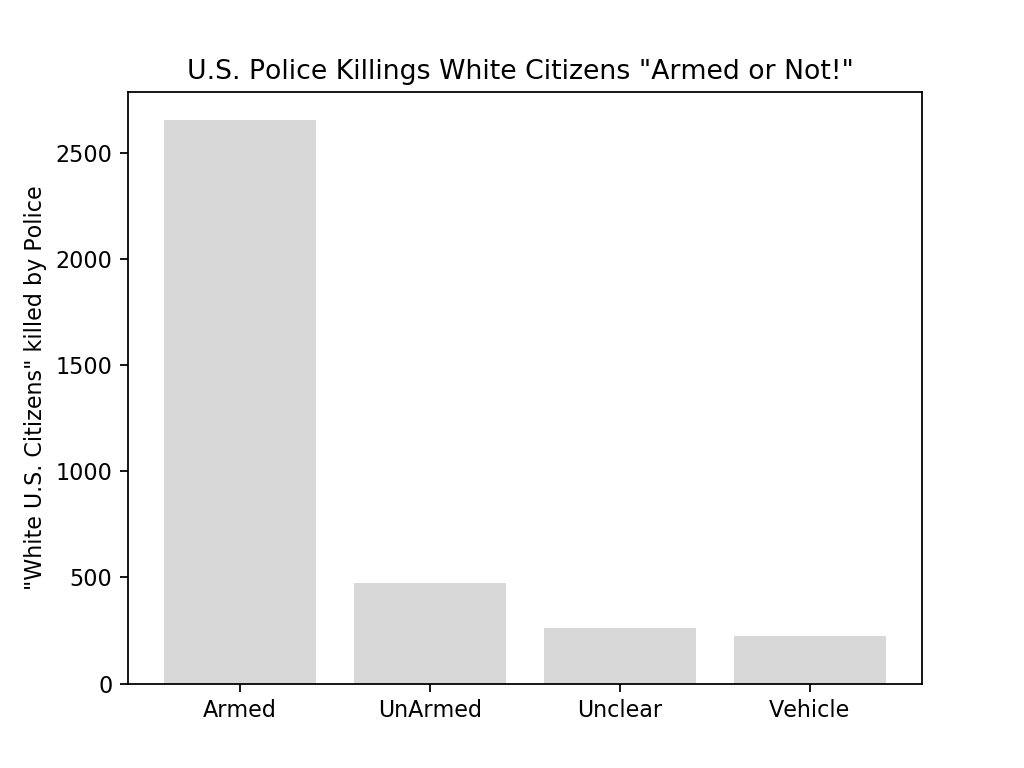

In [246]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

PDC_w_Armed = PDC_White.loc[(PDC_White['armed_or_unarmed']== 'Allegedly Armed')] 
PDC_w_Unarmed = PDC_White.loc[(PDC_White['armed_or_unarmed']== 'Unarmed/Did Not Have an Actual Weapon')] 
PDC_w_Unclear = PDC_White.loc[(PDC_White['armed_or_unarmed']== 'Unclear')] 
PDC_w_Vehicle = PDC_White.loc[(PDC_White['armed_or_unarmed']== 'Vehicle')] 


threat = ('Armed', 'UnArmed', 'Unclear', 'Vehicle')
whites = len(PDC_w_Armed), len(PDC_w_Unarmed), len(PDC_w_Unclear), len(PDC_w_Vehicle)
x_axis = np.arange(len(whites))

plt.bar(x_axis, whites, color='grey', alpha=0.3, align="center")

tl = [value for value in x_axis]
plt.xticks(tl, threat)

plt.title('U.S. Police Killings White Citizens "Armed or Not!" ')
plt.ylabel('"White U.S. Citizens" killed by Police')
plt.show()
plt.savefig('images/White.png')

<IPython.core.display.Javascript object>


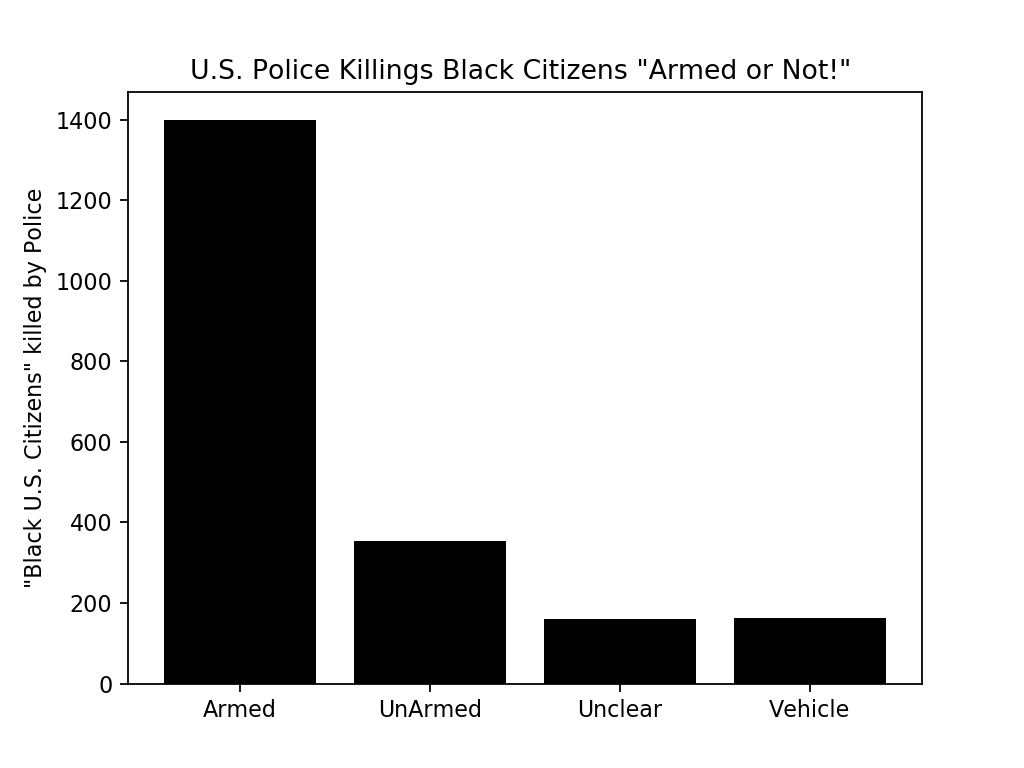

In [247]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

PDC_b_Armed = PDC_Black.loc[(PDC_Black['armed_or_unarmed']== 'Allegedly Armed')] 
PDC_b_Unarmed = PDC_Black.loc[(PDC_Black['armed_or_unarmed']== 'Unarmed/Did Not Have an Actual Weapon')] 
PDC_b_Unclear = PDC_Black.loc[(PDC_Black['armed_or_unarmed']== 'Unclear')] 
PDC_b_Vehicle = PDC_Black.loc[(PDC_Black['armed_or_unarmed']== 'Vehicle')] 


threat = ('Armed' , 'UnArmed', 'Unclear', 'Vehicle')
Blacks = len(PDC_b_Armed), len(PDC_b_Unarmed), len(PDC_b_Unclear), len(PDC_b_Vehicle)
x_axis = np.arange(len(Blacks))

plt.bar(x_axis, Blacks, color='black', alpha=1, align="center")

tl = [value for value in x_axis]
plt.xticks(tl, threat)

plt.title('U.S. Police Killings Black Citizens "Armed or Not!" ')
plt.ylabel('"Black U.S. Citizens" killed by Police')
plt.show()
plt.savefig('images/Black.png')

<IPython.core.display.Javascript object>


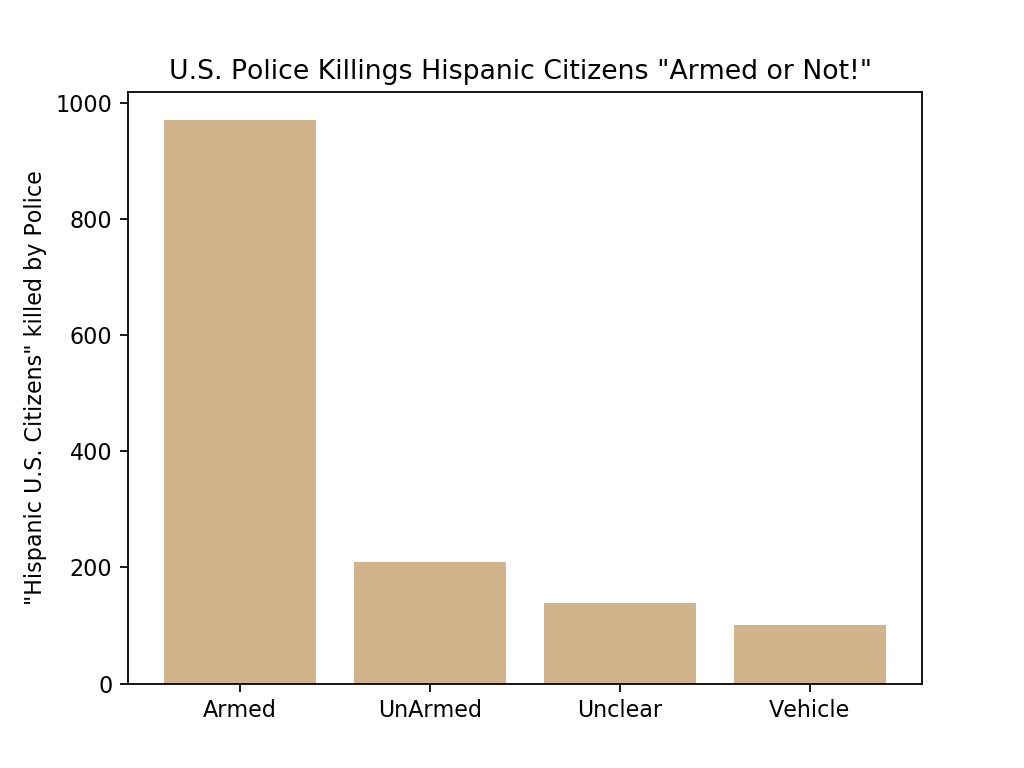

In [248]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

PDC_h_Armed = PDC_Hispanic.loc[(PDC_Hispanic['armed_or_unarmed']== 'Allegedly Armed')] 
PDC_h_Unarmed = PDC_Hispanic.loc[(PDC_Hispanic['armed_or_unarmed']== 'Unarmed/Did Not Have an Actual Weapon')] 
PDC_h_Unclear = PDC_Hispanic.loc[(PDC_Hispanic['armed_or_unarmed']== 'Unclear')] 
PDC_h_Vehicle = PDC_Hispanic.loc[(PDC_Hispanic['armed_or_unarmed']== 'Vehicle')] 


threat = ('Armed', 'UnArmed', 'Unclear', 'Vehicle')
Hispanics = len(PDC_h_Armed), len(PDC_h_Unarmed), len(PDC_h_Unclear), len(PDC_h_Vehicle)
x_axis = np.arange(len(Hispanics))

plt.bar(x_axis, Hispanics, color='tan', alpha=1, align="center")

tl = [value for value in x_axis]
plt.xticks(tl, threat)

plt.title('U.S. Police Killings Hispanic Citizens "Armed or Not!" ')
plt.ylabel('"Hispanic U.S. Citizens" killed by Police')
plt.show()
plt.savefig('images/Hispanic.png')

<IPython.core.display.Javascript object>


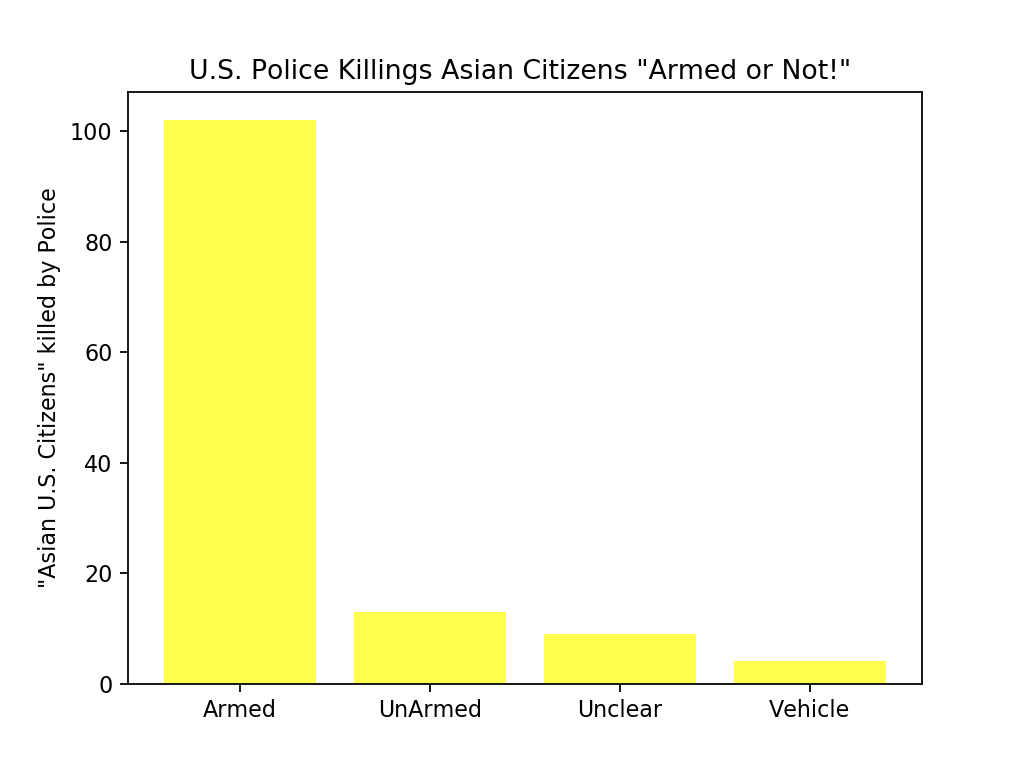

In [249]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

PDC_a_Armed = PDC_Asian.loc[(PDC_Asian['armed_or_unarmed']== 'Allegedly Armed')] 
PDC_a_Unarmed = PDC_Asian.loc[(PDC_Asian['armed_or_unarmed']== 'Unarmed/Did Not Have an Actual Weapon')] 
PDC_a_Unclear = PDC_Asian.loc[(PDC_Asian['armed_or_unarmed']== 'Unclear')] 
PDC_a_Vehicle = PDC_Asian.loc[(PDC_Asian['armed_or_unarmed']== 'Vehicle')] 


threat = ('Armed', 'UnArmed', 'Unclear', 'Vehicle')
Asians = len(PDC_a_Armed), len(PDC_a_Unarmed), len(PDC_a_Unclear), len(PDC_a_Vehicle)
x_axis = np.arange(len(Asians))

plt.bar(x_axis, Asians, color='yellow', alpha=0.7, align="center")

tl = [value for value in x_axis]
plt.xticks(tl, threat)

plt.title('U.S. Police Killings Asian Citizens "Armed or Not!" ')
plt.ylabel('"Asian U.S. Citizens" killed by Police')
plt.show()
plt.savefig('images/Asian.png')

In [251]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

PDC_u_Armed = PDC_Unknown.loc[(PDC_Unknown['armed_or_unarmed']== 'Allegedly Armed')] 
PDC_u_Unarmed = PDC_Unknown.loc[(PDC_Unknown['armed_or_unarmed']== 'Unarmed/Did Not Have an Actual Weapon')] 
PDC_u_Unclear = PDC_Unknown.loc[(PDC_Unknown['armed_or_unarmed']== 'Unclear')] 
PDC_u_Vehicle = PDC_Unknown.loc[(PDC_Unknown['armed_or_unarmed']== 'Vehicle')] 


threat = ('Armed', 'UnArmed', 'Unclear', 'Vehicle')
Unknowns = len(PDC_u_Armed), len(PDC_u_Unarmed), len(PDC_u_Unclear), len(PDC_u_Vehicle)
x_axis = np.arange(len(Unknowns))

plt.bar(x_axis, Unknowns, color='green', alpha=0.2, align="center")

tl = [value for value in x_axis]
plt.xticks(tl, threat)

plt.title('U.S. Police Killings Unknown Citizens "Armed or Not!" ')
plt.ylabel('"Unknown U.S. Citizens" killed by Police')
plt.show()plt.savefig('images/Unknown.png')

SyntaxError: invalid syntax (<ipython-input-251-811a3df54e2c>, line 22)

<IPython.core.display.Javascript object>


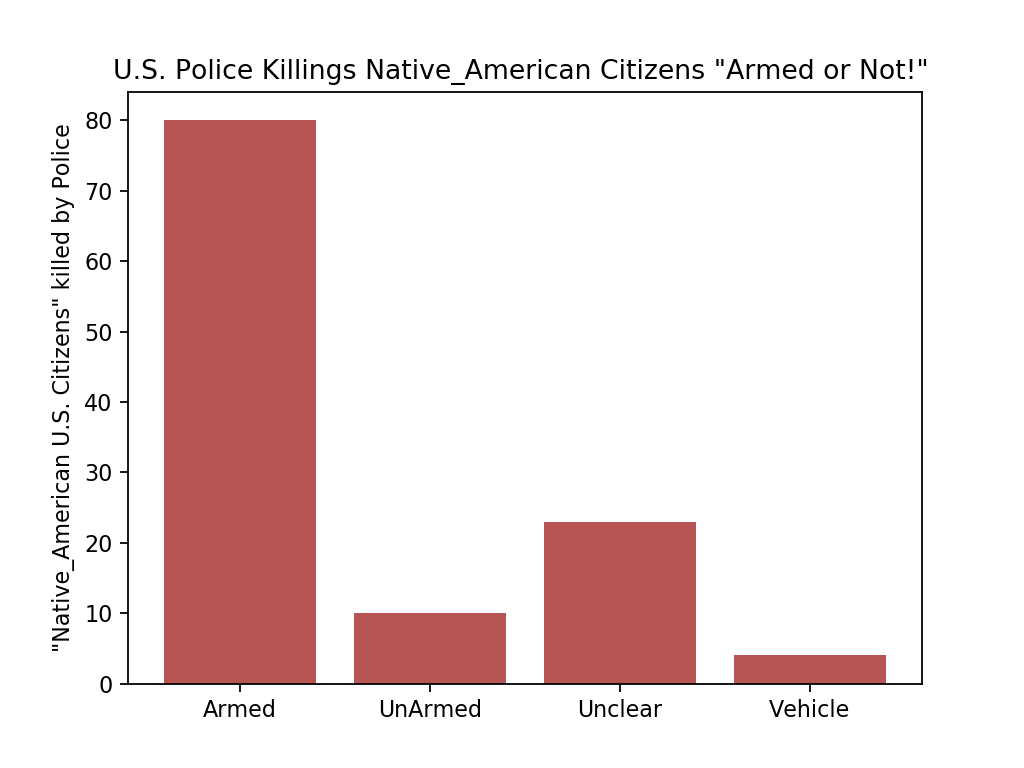

In [253]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

PDC_n_Armed = PDC_Native_American.loc[(PDC_Native_American['armed_or_unarmed']== 'Allegedly Armed')] 
PDC_n_Unarmed = PDC_Native_American.loc[(PDC_Native_American['armed_or_unarmed']== 'Unarmed/Did Not Have an Actual Weapon')] 
PDC_n_Unclear = PDC_Native_American.loc[(PDC_Native_American['armed_or_unarmed']== 'Unclear')] 
PDC_n_Vehicle = PDC_Native_American.loc[(PDC_Native_American['armed_or_unarmed']== 'Vehicle')] 


threat = ('Armed', 'UnArmed', 'Unclear', 'Vehicle')
Native_Americans = len(PDC_n_Armed), len(PDC_n_Unarmed), len(PDC_n_Unclear), len(PDC_n_Vehicle)
x_axis = np.arange(len(Native_Americans))

plt.bar(x_axis, Native_Americans, color='brown', alpha=.8, align="center")

tl = [value for value in x_axis]
plt.xticks(tl, threat)

plt.title('U.S. Police Killings Native_American Citizens "Armed or Not!" ')
plt.ylabel('"Native_American U.S. Citizens" killed by Police')
plt.show()
plt.savefig('images/Native_American.png')

<IPython.core.display.Javascript object>


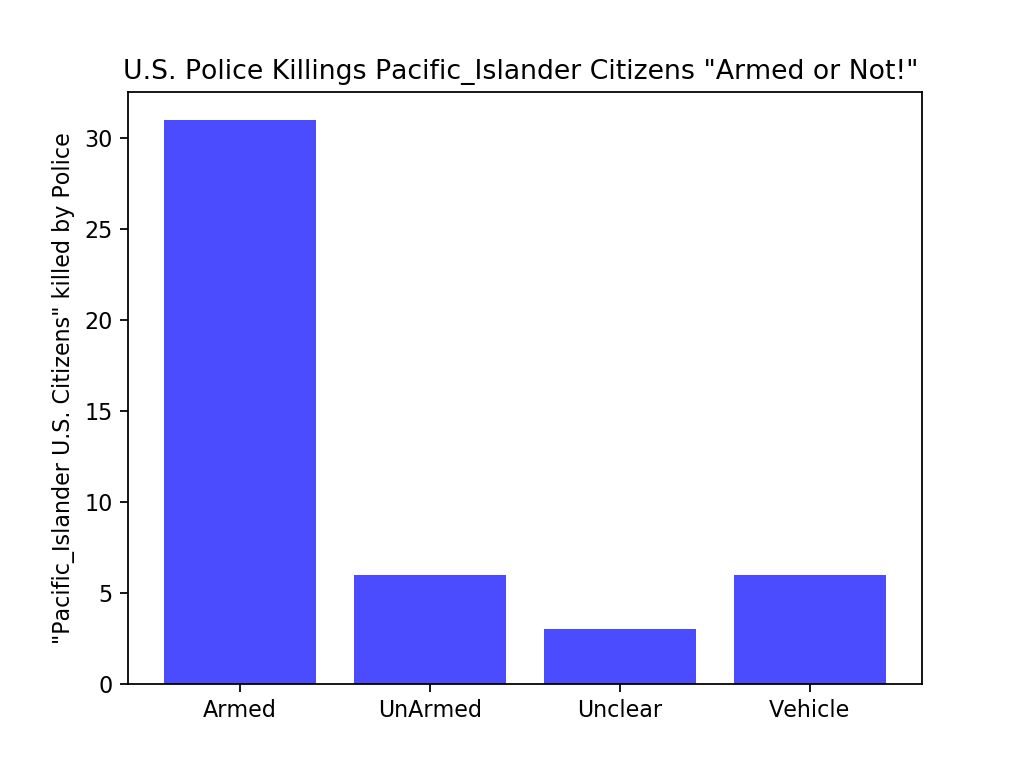

In [255]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

PDC_p_Armed = PDC_Pacific_Islander.loc[(PDC_Pacific_Islander['armed_or_unarmed']== 'Allegedly Armed')] 
PDC_p_Unarmed = PDC_Pacific_Islander.loc[(PDC_Pacific_Islander['armed_or_unarmed']== 'Unarmed/Did Not Have an Actual Weapon')] 
PDC_p_Unclear = PDC_Pacific_Islander.loc[(PDC_Pacific_Islander['armed_or_unarmed']== 'Unclear')] 
PDC_p_Vehicle = PDC_Pacific_Islander.loc[(PDC_Pacific_Islander['armed_or_unarmed']== 'Vehicle')] 


threat = ('Armed', 'UnArmed', 'Unclear', 'Vehicle')
Pacific_Islanders = len(PDC_p_Armed), len(PDC_p_Unarmed), len(PDC_p_Unclear), len(PDC_p_Vehicle)
x_axis = np.arange(len(Pacific_Islanders))

plt.bar(x_axis, Pacific_Islanders, color='blue', alpha=0.7, align="center")

tl = [value for value in x_axis]
plt.xticks(tl, threat)

plt.title('U.S. Police Killings Pacific_Islander Citizens "Armed or Not!" ')
plt.ylabel('"Pacific_Islander U.S. Citizens" killed by Police')
plt.show()
plt.savefig('images/Pacific_Islander.png')

<IPython.core.display.Javascript object>


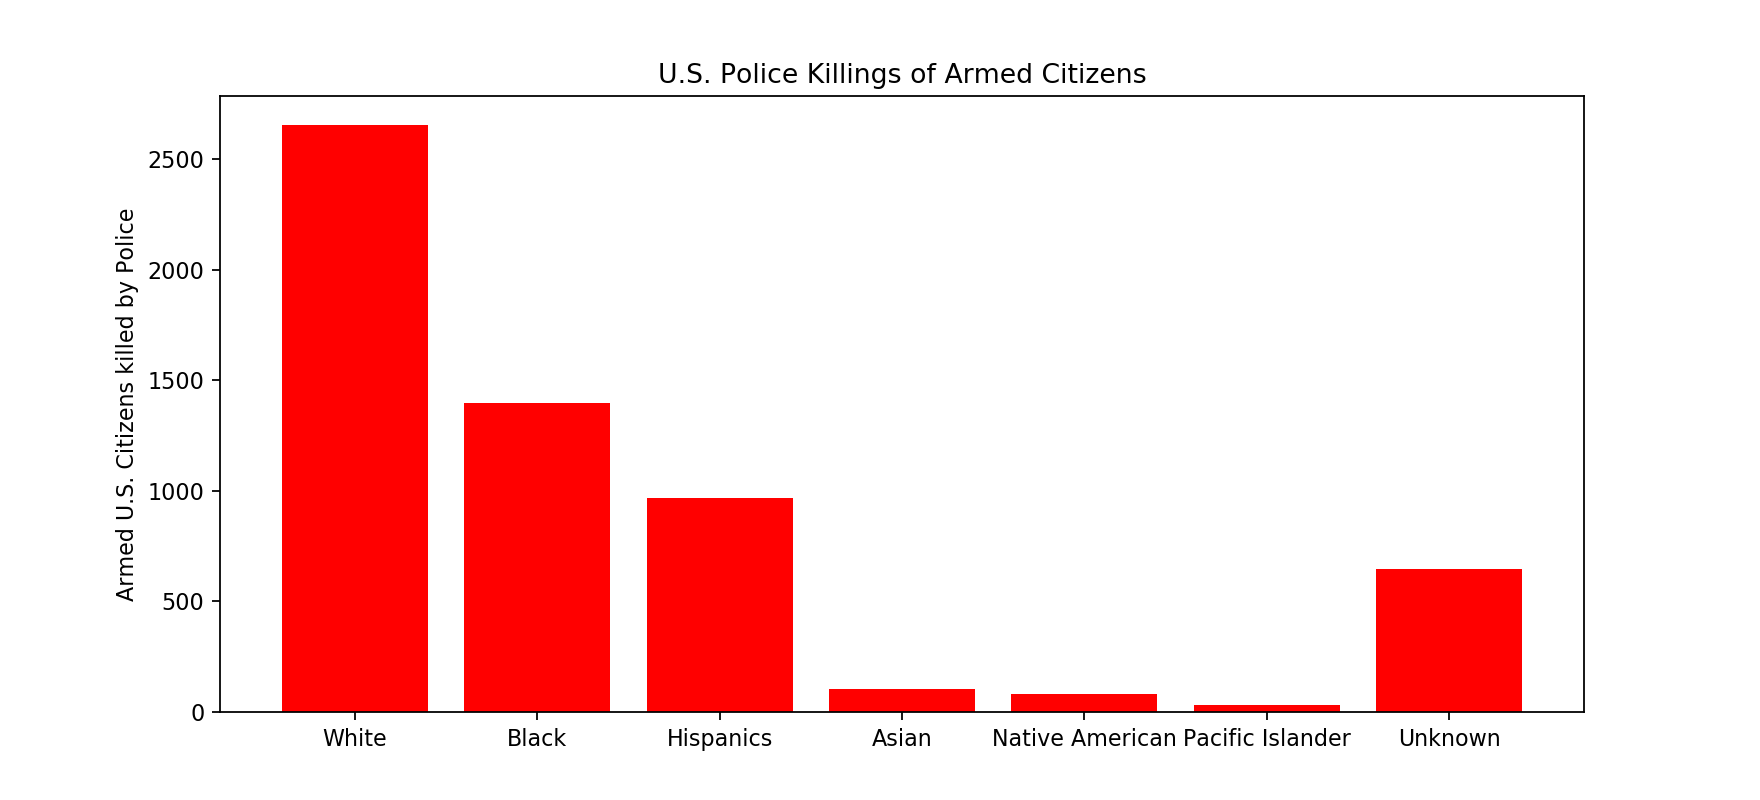

In [256]:

%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

race = ('White', 'Black', 'Hispanics', 'Asian', 'Native American', 'Pacific Islander', 'Unknown')
Armed = len(PDC_w_Armed), len(PDC_b_Armed), len(PDC_h_Armed), len(PDC_a_Armed), len(PDC_n_Armed), len(PDC_p_Armed), len(PDC_u_Armed),
x_axis = np.arange(len(Armed))

plt.figure(figsize=(11,5))
plt.bar(x_axis, Armed, color='r', alpha=1, align="center")

tl = [value for value in x_axis]
plt.xticks(tl, race)


plt.title('U.S. Police Killings of Armed Citizens')
plt.ylabel('Armed U.S. Citizens killed by Police')
plt.show()
plt.savefig('images/_Armed.png')

<IPython.core.display.Javascript object>


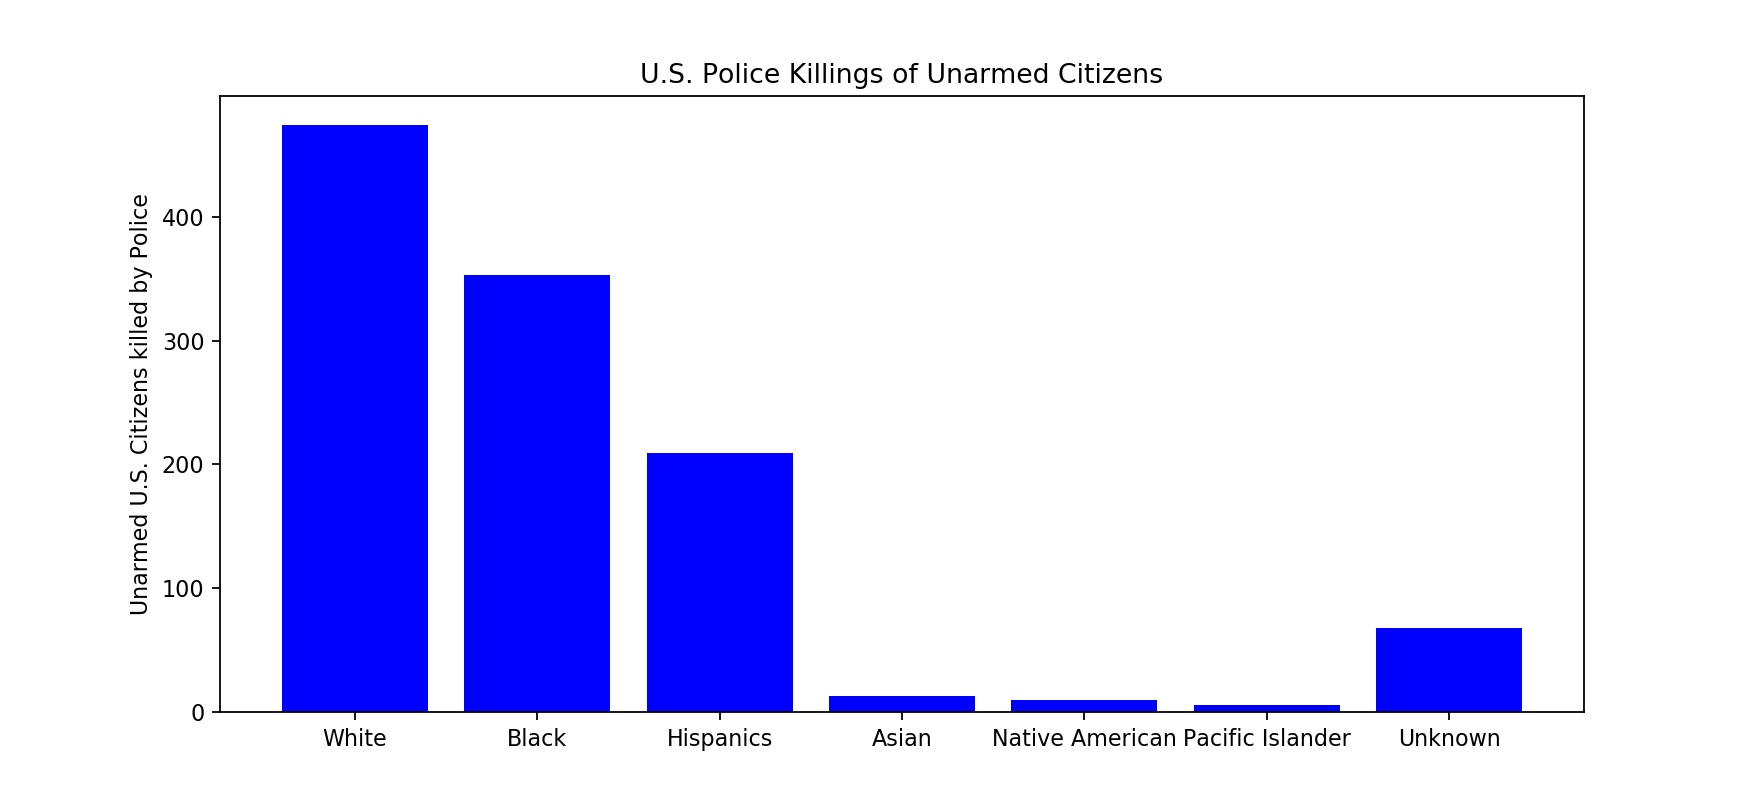

In [257]:

%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

race = ('White', 'Black', 'Hispanics', 'Asian', 'Native American', 'Pacific Islander', 'Unknown')
Unarmed = len(PDC_w_Unarmed), len(PDC_b_Unarmed), len(PDC_h_Unarmed), len(PDC_a_Unarmed), len(PDC_n_Unarmed), len(PDC_p_Unarmed), len(PDC_u_Unarmed),
x_axis = np.arange(len(Unarmed))

plt.figure(figsize=(11,5))
plt.bar(x_axis, Unarmed, color='b', alpha=1, align="center")

tl = [value for value in x_axis]
plt.xticks(tl, race)


plt.title('U.S. Police Killings of Unarmed Citizens')
plt.ylabel('Unarmed U.S. Citizens killed by Police')
plt.show()
plt.savefig('images/_Unarmed.png')

<IPython.core.display.Javascript object>


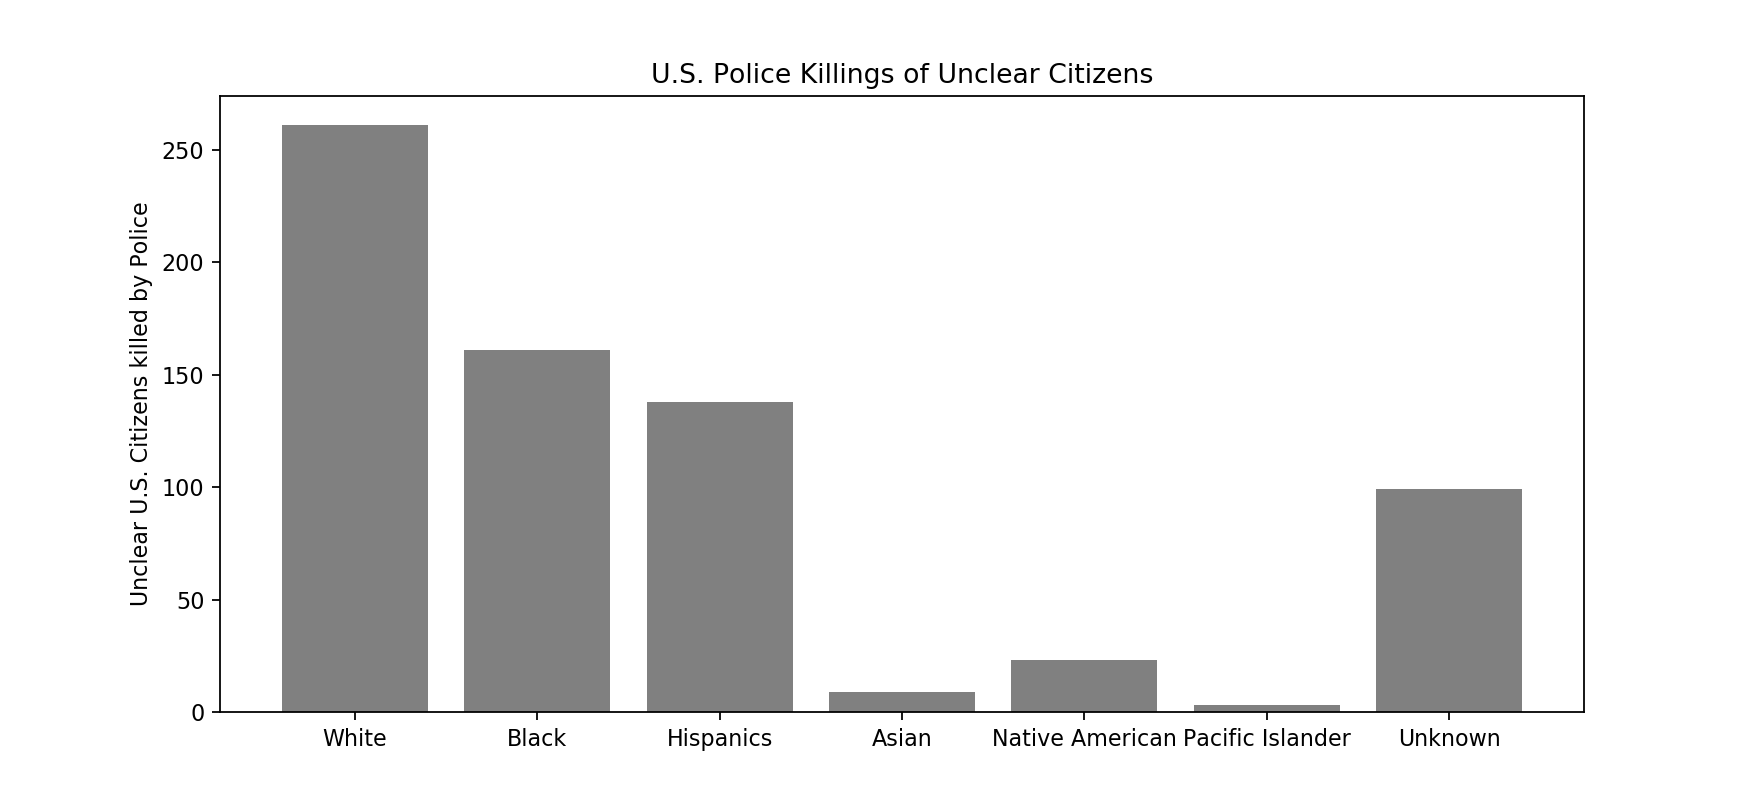

In [258]:

%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

race = ('White', 'Black', 'Hispanics', 'Asian', 'Native American', 'Pacific Islander', 'Unknown')
Unclear = len(PDC_w_Unclear), len(PDC_b_Unclear), len(PDC_h_Unclear), len(PDC_a_Unclear), len(PDC_n_Unclear), len(PDC_p_Unclear), len(PDC_u_Unclear),
x_axis = np.arange(len(Unclear))

plt.figure(figsize=(11,5))
plt.bar(x_axis, Unclear, color='grey', alpha=1, align="center")

tl = [value for value in x_axis]
plt.xticks(tl, race)


plt.title('U.S. Police Killings of Unclear Citizens')
plt.ylabel('Unclear U.S. Citizens killed by Police')
plt.show()
plt.savefig('images/_Unclear.png')

<IPython.core.display.Javascript object>


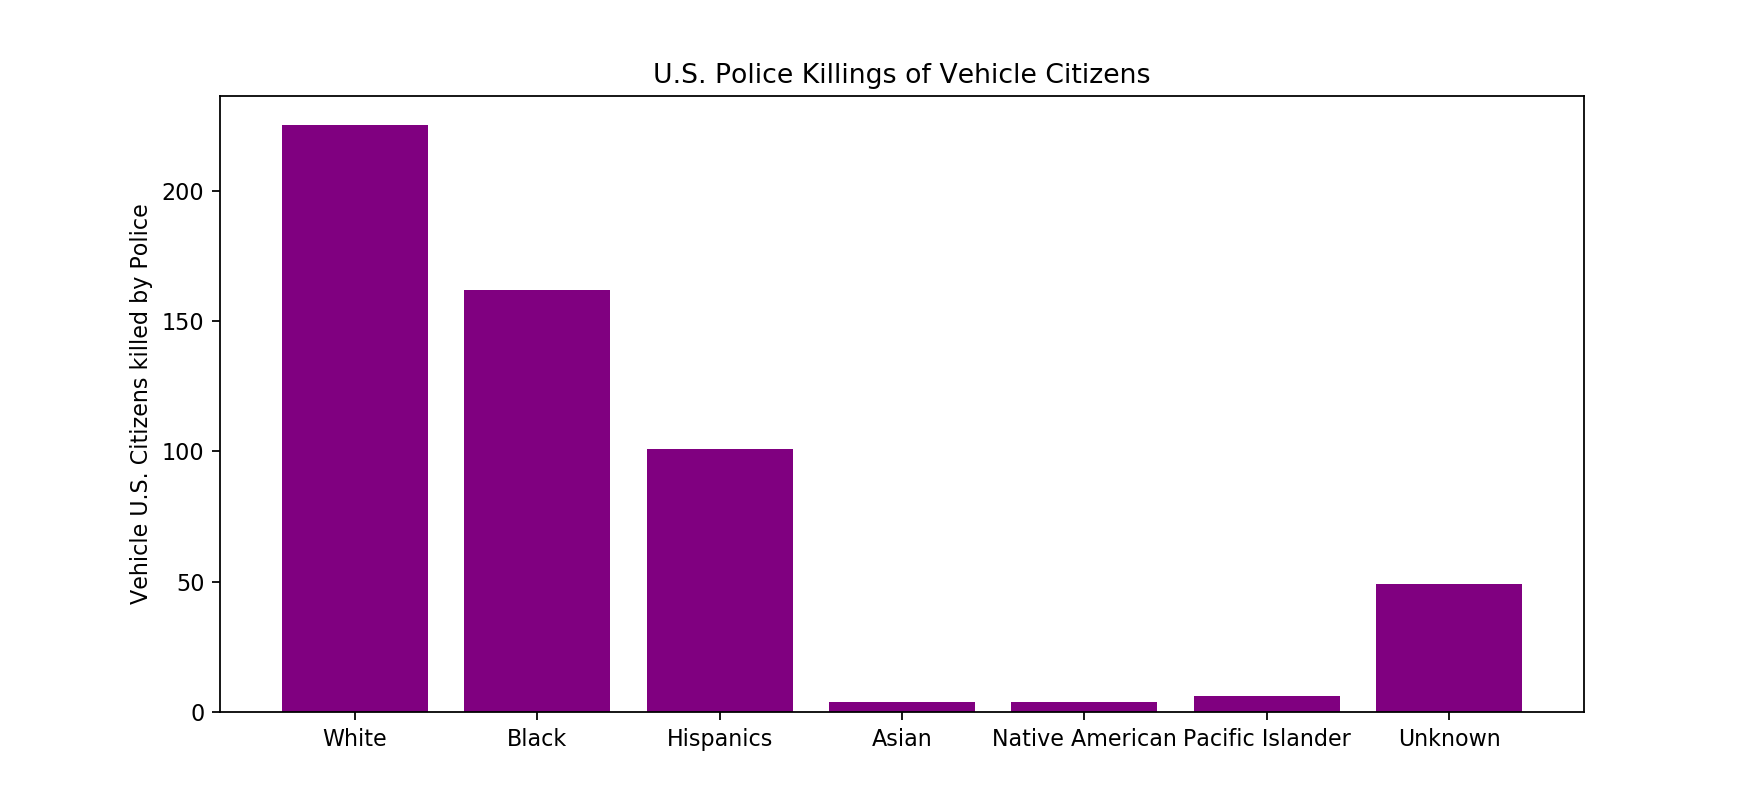

In [259]:

%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

race = ('White', 'Black', 'Hispanics', 'Asian', 'Native American', 'Pacific Islander', 'Unknown')
Vehicle = len(PDC_w_Vehicle), len(PDC_b_Vehicle), len(PDC_h_Vehicle), len(PDC_a_Vehicle), len(PDC_n_Vehicle), len(PDC_p_Vehicle), len(PDC_u_Vehicle),
x_axis = np.arange(len(Vehicle))

plt.figure(figsize=(11,5))
plt.bar(x_axis, Vehicle, color='purple', alpha=1, align="center")

tl = [value for value in x_axis]
plt.xticks(tl, race)


plt.title('U.S. Police Killings of Vehicle Citizens')
plt.ylabel('Vehicle U.S. Citizens killed by Police')
plt.show()
plt.savefig('images/_Vehicle.png')

In [261]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Fixing random state for reproducibility
# # np.random.seed(19680801)


# plt.rcdefaults()
# fig, ax = plt.subplots()

# # Example data
# people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
# y_pos = np.arange(len(people))
# performance = 3 + 10 * np.random.rand(len(people))
# error = np.random.rand(len(people))

# ax.barh(y_pos, performance, xerr=error, align='center')
# ax.set_yticks(y_pos)
# ax.set_yticklabels(people)
# ax.invert_yaxis()  # labels read top-to-bottom
# ax.set_xlabel('Performance')
# ax.set_title('How fast do you want to go today?')

# plt.show() 

In [262]:
# N = 5
# menMeans = (20, 35, 30, 35, 27)
# womenMeans = (25, 32, 34, 20, 25)
# menStd = (2, 3, 4, 1, 2)
# womenStd = (3, 5, 2, 3, 3)
# ind = np.arange(N)    # the x locations for the groups
# width = 0.35       # the width of the bars: can also be len(x) sequence

# p1 = plt.bar(ind, menMeans, width, yerr=menStd)
# p2 = plt.bar(ind, womenMeans, width,
#              bottom=menMeans, yerr=womenStd)

# plt.ylabel('Scores')
# plt.title('Scores by group and gender')
# plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
# plt.yticks(np.arange(0, 81, 10))
# plt.legend((p1[0], p2[0]), ('Men', 'Women'))

# plt.show()

In [263]:
# import matplotlib
# import matplotlib.pyplot as plt
# import numpy as np

# st, arm, race#
# men_means= (20, 35, 30, 35, 27) 
# women_means = (25, 32, 34, 20, 25)

# ind = np.arange(len(men_means))  # the x locations for the groups
# width = 0.35  # the width of the bars

# fig, ax = plt.subplots()
# rects1 = ax.bar(ind - width/2, men_means, width, 
#                 label='Men')
# rects2 = ax.bar(ind + width/2, women_means, width, 
#                 label='Women')

# # Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Scores')
# ax.set_title('Scores by group and gender')
# ax.set_xticks(ind)
# ax.set_xticklabels(('G1', 'G2', 'G3', 'G4', 'G5'))
# ax.legend()


# def autolabel(rects, xpos='center'):
#     """
#     Attach a text label above each bar in *rects*, displaying its height.

#     *xpos* indicates which side to place the text w.r.t. the center of
#     the bar. It can be one of the following {'center', 'right', 'left'}.
#     """

#     ha = {'center': 'center', 'right': 'left', 'left': 'right'}
#     offset = {'center': 0, 'right': 1, 'left': -1}

#     for rect in rects:
#         height = rect.get_height()
#         ax.annotate('{}'.format(height),
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(offset[xpos]*3, 3),  # use 3 points offset
#                     textcoords="offset points",  # in both directions
#                     ha=ha[xpos], va='bottom')


# autolabel(rects1, "left")
# autolabel(rects2, "right")

# fig.tight_layout()

# plt.show()

### DOD  Equipment  Data

In [264]:
##Rename columns so they can easily be queried
dod_equipment_df.columns = ['state','station_name','nsn','item_name','quantity','ui','acquisition_value','demil_code','demil_ic','ship_date','state_name']
# dod_equipment_df.head(10)

In [265]:
dod_cols = ["state","station_name","nsn","item_name","quantity","ui","acquisition_value","demil_code","demil_ic","ship_date"]
dod_equipment_cleaned = dod_equipment_df[dod_cols].copy()

In [266]:
# dod_equipment_cleaned.head()

In [267]:
# dod_equipment_cleaned.dtypes

In [268]:
##Update index by 1 to be the unique value in the postgressql table
dod_equipment_cleaned.index = range(1,len(dod_equipment_cleaned)+1)

In [269]:
dod_df = dod_equipment_cleaned
# dod_df.head()

In [214]:
ST = dod_df.groupby("state")
print(ST["state"].count())

state
AK      297
AL     6580
AR     2757
AZ     3732
CA    11311
CO     3463
CT     1674
DE      765
FL     7915
GA     7056
GU      166
IA     1368
ID     1021
IL     6868
IN     5572
KS     1088
KY     4810
LA     2289
MA     1270
MD     2546
ME     1169
MI     7389
MN     3898
MO     2589
MS      872
MT      751
NC     3168
ND     1283
NE      345
NH      686
NJ     4198
NM      448
NV     1000
NY     1138
OH     8664
OK     1639
OR     1147
PA     2100
PR      371
RI      763
SC     7296
SD      806
TN     8206
TX    10233
UT     1009
VA     2797
VI       13
VT      188
WA     2191
WI     3933
WV     1525
WY      417
Name: state, dtype: int64


In [235]:
AK = dod_df.loc[(dod_df['state']== 'AK')]
AK_total = sum(AK['quantity'] * AK['acquisition_value'])
AK_total

AL = dod_df.loc[(dod_df['state']== 'AL')]
AL_total = sum(AL['quantity'] * AL['acquisition_value'])
AL_total

AR = dod_df.loc[(dod_df['state']== 'AR')]
AR_total = sum(AR['quantity'] * AR['acquisition_value'])
AR_total

AZ = dod_df.loc[(dod_df['state']== 'AZ')]
AZ_total = sum(AZ['quantity'] * AZ['acquisition_value'])
AZ_total

CA = dod_df.loc[(dod_df['state']== 'CA')]
CA_total = sum(CA['quantity'] * CA['acquisition_value'])
CA_total

CO = dod_df.loc[(dod_df['state']== 'CO')]
CO_total = sum(CO['quantity'] * CO['acquisition_value'])
CO_total

CT = dod_df.loc[(dod_df['state']== 'CT')]
CT_total = sum(CT['quantity'] * CT['acquisition_value'])
CT_total

DE = dod_df.loc[(dod_df['state']== 'DE')]
DE_total = sum(DE['quantity'] * DE['acquisition_value'])
DE_total

FL = dod_df.loc[(dod_df['state']== 'FL')]
FL_total = sum(FL['quantity'] * FL['acquisition_value'])
FL_total

GA = dod_df.loc[(dod_df['state']== 'GA')]
GA_total = sum(GA['quantity'] * GA['acquisition_value'])
GA_total

GU = dod_df.loc[(dod_df['state']== 'GU')]
GU_total = sum(GU['quantity'] * GU['acquisition_value'])
GU_total

IA = dod_df.loc[(dod_df['state']== 'IA')]
IA_total = sum(IA['quantity'] * IA['acquisition_value'])
IA_total


ID = dod_df.loc[(dod_df['state']== 'ID')]
ID_total = sum(ID['quantity'] * ID['acquisition_value'])
ID_total


IL = dod_df.loc[(dod_df['state']== 'IL')]
IL_total = sum(IL['quantity'] * IL['acquisition_value'])
IL_total

IN = dod_df.loc[(dod_df['state']== 'IN')]
IN_total = sum(IN['quantity'] * IN['acquisition_value'])
IN_total

KS = dod_df.loc[(dod_df['state']== 'KS')]
KS_total = sum(KS['quantity'] * KS['acquisition_value'])
KS_total

KY = dod_df.loc[(dod_df['state']== 'KY')]
KY_total = sum(KY['quantity'] * KY['acquisition_value'])
KY_total

LA = dod_df.loc[(dod_df['state']== 'LA')]
LA_total = sum(LA['quantity'] * LA['acquisition_value'])
LA_total


MA = dod_df.loc[(dod_df['state']== 'MA')]
MA_total = sum(MA['quantity'] * MA['acquisition_value'])
MA_total

MD = dod_df.loc[(dod_df['state']== 'MD')]
MD_total = sum(MD['quantity'] * MD['acquisition_value'])
MD_total

ME = dod_df.loc[(dod_df['state']== 'ME')]
ME_total = sum(ME['quantity'] * ME['acquisition_value'])
ME_total

MI = dod_df.loc[(dod_df['state']== 'MI')]
MI_total = sum(MI['quantity'] * MI['acquisition_value'])
MI_total

MN = dod_df.loc[(dod_df['state']== 'MN')]
MN_total = sum(MN['quantity'] * MN['acquisition_value'])
MN_total

MO = dod_df.loc[(dod_df['state']== 'MO')]
MO_total = sum(MO['quantity'] * MO['acquisition_value'])
MO_total


MS = dod_df.loc[(dod_df['state']== 'MS')]
MS_total = sum(MS['quantity'] * MS['acquisition_value'])
MS_total

MT = dod_df.loc[(dod_df['state']== 'MT')]
MT_total = sum(MT['quantity'] * MT['acquisition_value'])
MT_total

NC = dod_df.loc[(dod_df['state']== 'NC')]
NC_total = sum(NC['quantity'] * NC['acquisition_value'])
NC_total

ND = dod_df.loc[(dod_df['state']== 'ND')]
ND_total = sum(ND['quantity'] * ND['acquisition_value'])
ND_total

NE = dod_df.loc[(dod_df['state']== 'NE')]
NE_total = sum(NE['quantity'] * NE['acquisition_value'])
NE_total

NH = dod_df.loc[(dod_df['state']== 'NH')]
NH_total = sum(NH['quantity'] * NH['acquisition_value'])
NH_total


NJ = dod_df.loc[(dod_df['state']== 'NJ')]
NJ_total = sum(NJ['quantity'] * NJ['acquisition_value'])
NJ_total

NM = dod_df.loc[(dod_df['state']== 'NM')]
NM_total = sum(NM['quantity'] * NM['acquisition_value'])
NM_total

NV = dod_df.loc[(dod_df['state']== 'NV')]
NV_total = sum(NV['quantity'] * NV['acquisition_value'])
NV_total

NY = dod_df.loc[(dod_df['state']== 'NY')]
NY_total = sum(NY['quantity'] * NY['acquisition_value'])
NY_total

OH = dod_df.loc[(dod_df['state']== 'OH')]
OH_total = sum(OH['quantity'] * OH['acquisition_value'])
OH_total

OK = dod_df.loc[(dod_df['state']== 'OK')]
OK_total = sum(OK['quantity'] * OK['acquisition_value'])
OK_total


OR = dod_df.loc[(dod_df['state']== 'OR')]
OR_total = sum(OR['quantity'] * OR['acquisition_value'])
OR_total

PA = dod_df.loc[(dod_df['state']== 'PA')]
PA_total = sum(PA['quantity'] * PA['acquisition_value'])
PA_total

PR = dod_df.loc[(dod_df['state']== 'PR')]
PR_total = sum(PR['quantity'] * PR['acquisition_value'])
PR_total

RI = dod_df.loc[(dod_df['state']== 'RI')]
RI_total = sum(RI['quantity'] * RI['acquisition_value'])
RI_total

SC = dod_df.loc[(dod_df['state']== 'SC')]
SC_total = sum(SC['quantity'] * SC['acquisition_value'])
SC_total

SD = dod_df.loc[(dod_df['state']== 'SD')]
SD_total = sum(SD['quantity'] * SD['acquisition_value'])
SD_total


TN = dod_df.loc[(dod_df['state']== 'TN')]
TN_total = sum(TN['quantity'] * TN['acquisition_value'])
TN_total

TX = dod_df.loc[(dod_df['state']== 'TX')]
TX_total = sum(TX['quantity'] * TX['acquisition_value'])
TX_total

UT = dod_df.loc[(dod_df['state']== 'UT')]
UT_total = sum(UT['quantity'] * UT['acquisition_value'])
UT_total

VA = dod_df.loc[(dod_df['state']== 'VA')]
VA_total = sum(VA['quantity'] * VA['acquisition_value'])
VA_total

VI = dod_df.loc[(dod_df['state']== 'VI')]
VI_total = sum(VI['quantity'] * VI['acquisition_value'])
VI_total

VT = dod_df.loc[(dod_df['state']== 'VT')]
VT_total = sum(VT['quantity'] * VT['acquisition_value'])
VT_total


WA = dod_df.loc[(dod_df['state']== 'WA')]
WA_total = sum(WA['quantity'] * WA['acquisition_value'])
WA_total

WI = dod_df.loc[(dod_df['state']== 'WI')]
WI_total = sum(WI['quantity'] * WI['acquisition_value'])
WI_total

WV = dod_df.loc[(dod_df['state']== 'WV')]
WV_total = sum(WV['quantity'] * WV['acquisition_value'])
WV_total

WY = dod_df.loc[(dod_df['state']== 'WY')]
WY_total = sum(WY['quantity'] * WY['acquisition_value'])
WY_total


4815415.39

# ST_abb = ('AK',
'AL',
'AR',
'AZ',
'CA',
'CO',
'CT',
'DE',
'FL',
'GA',
'GU',
'IA',
'ID',
'IL',
'IN',
'KS',
'KY',
'LA',
'MA',
'MD',
'ME',
'MI',
'MN',
'MO',
'MS',
'MT',
'NC',
'ND',
'NE',
'NH',
'NJ',
'NM',
'NV',
'NY',
'OH',
'OK',
'OR',
'PA',
'PR',
'RI',
'SC',
'SD',
'TN',
'TX',
'UT',
'VA',
'VI',
'VT',
'WA',
'WI',
'WV',
'WY')

totals = (AK_total,
AL_total,
AR_total,
AZ_total,
CA_total,
CO_total,
CT_total,
DE_total,
FL_total,
GA_total,
GU_total,
IA_total,
ID_total,
IL_total,
IN_total,
KS_total,
KY_total,
LA_total,
MA_total,
MD_total,
ME_total,
MI_total,
MN_total,
MO_total,
MS_total,
MT_total,
NC_total,
ND_total,
NE_total,
NH_total,
NJ_total,
NM_total,
NV_total,
NY_total,
OH_total,
OK_total,
OR_total,
PA_total,
PR_total,
RI_total,
SC_total,
SD_total,
TN_total,
TX_total,
UT_total,
VA_total,
VI_total,
VT_total,
WA_total,
WI_total,
WV_total,
WY_total)
totals

<IPython.core.display.Javascript object>


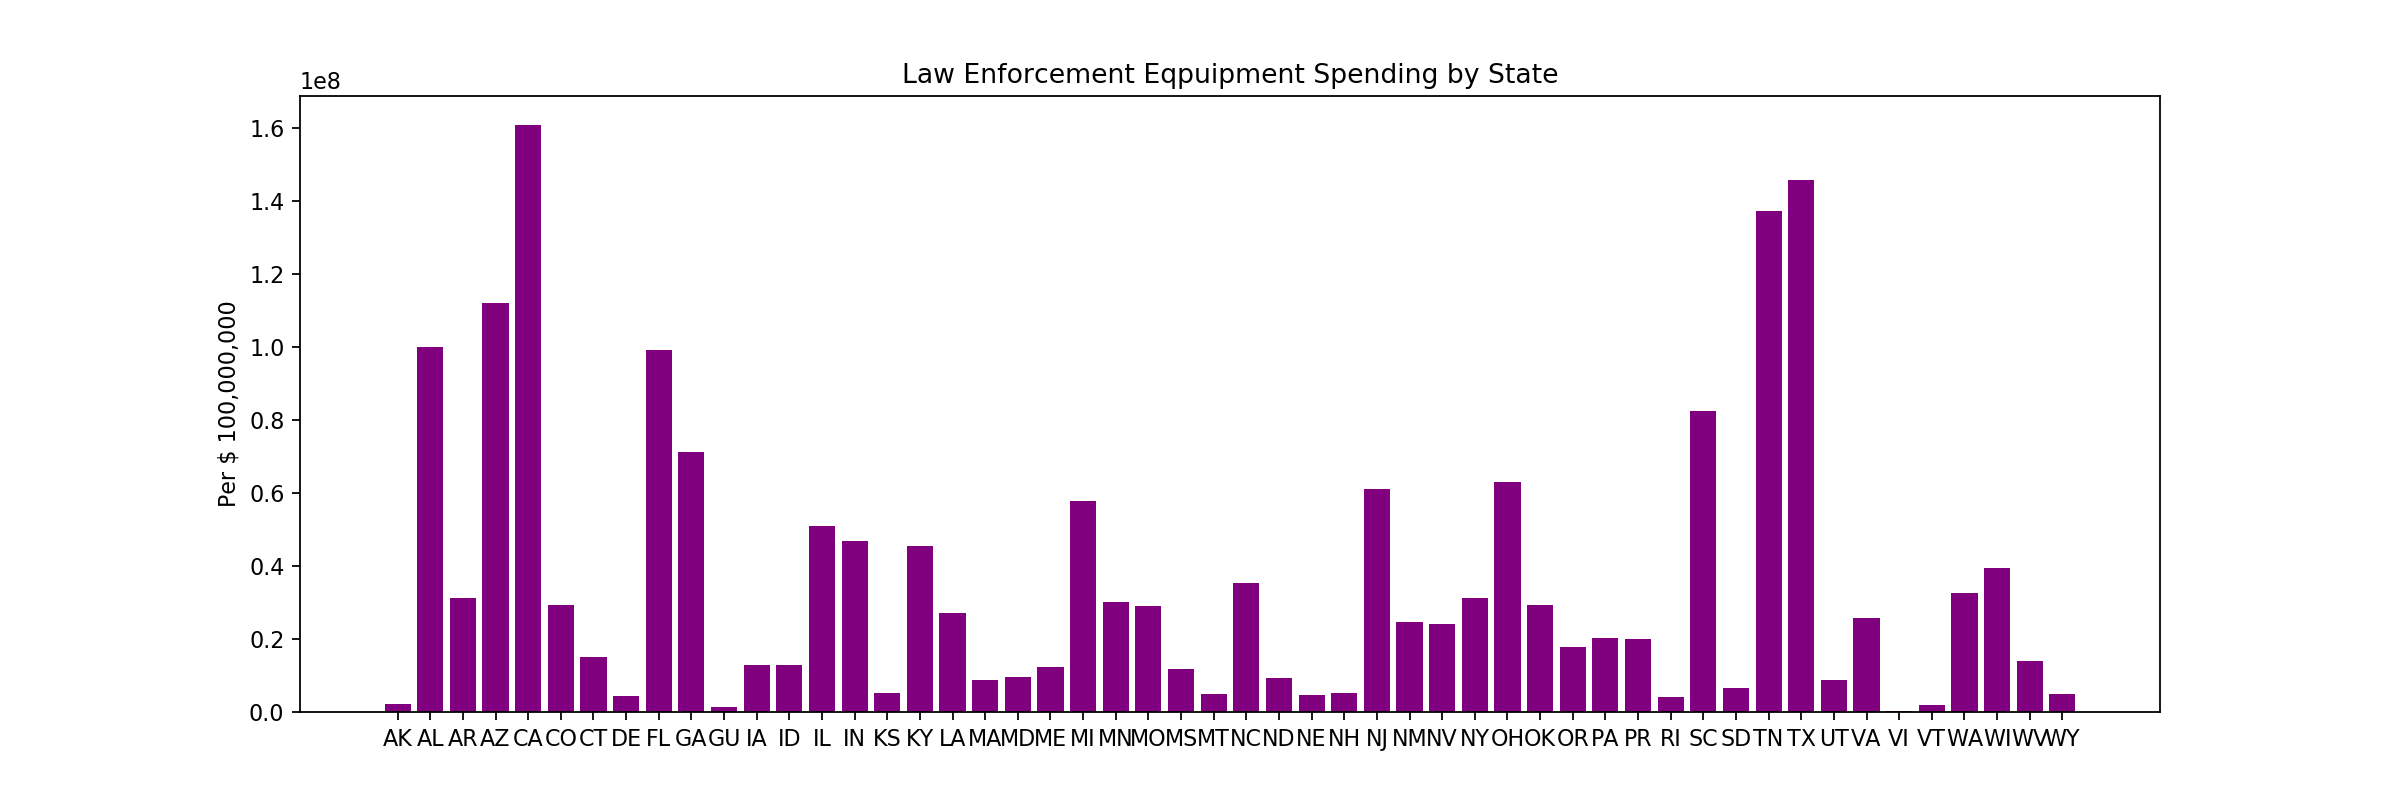

In [271]:
%matplotlib notebook 
import matplotlib.pyplot as plt 
import numpy as np

x_axis = np.arange(len(totals))

plt.figure(figsize=(15,5))
plt.bar(x_axis, totals, color='purple', alpha=1, align="center")

tl = [value for value in x_axis]
plt.xticks(tl, ST_abb)

plt.title('Law Enforcement Eqpuipment Spending by State')
plt.ylabel('Per $ 100,000,000')
plt.show()
plt.savefig('images/DOD_State_Spending.png')